In [72]:
import os, sys
os.chdir(sys.path[0])
sys.path.append("..")

%matplotlib inline
import matplotlib.pyplot as plt
from src.ssa.ssa import *
from data.load import *
import numpy as np

In [73]:
L = 50
fs = 1
num = 1000
t = np.arange(0, num, 1)
t = t /fs
omega = 1/17
# x = np.exp(t/100) + np.sin(2*np.pi*t*omega) + 0.5*np.sin(2*np.pi*t/10) + np.random.randn(num)
x = np.random.randn(num)

In [74]:
model = SSA(L, 1, 1)
model.embedding(x)
model.decomposition_safe()
model.reconstruction()
model.grouping(option='SC')

 相空间维度： 50
 相空间轨迹点个数： 951
 轨迹矩阵的秩： 50


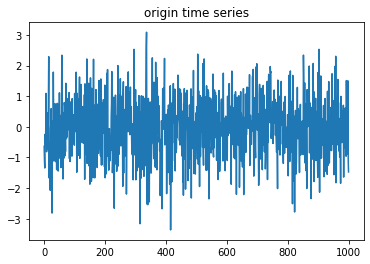

In [75]:
#! 绘制时间序列
plt.figure()
plt.plot(x)
plt.title('origin time series')
plt.show()

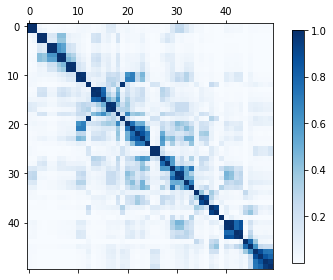

In [76]:
plot_wmatrix(model.w_matrix)

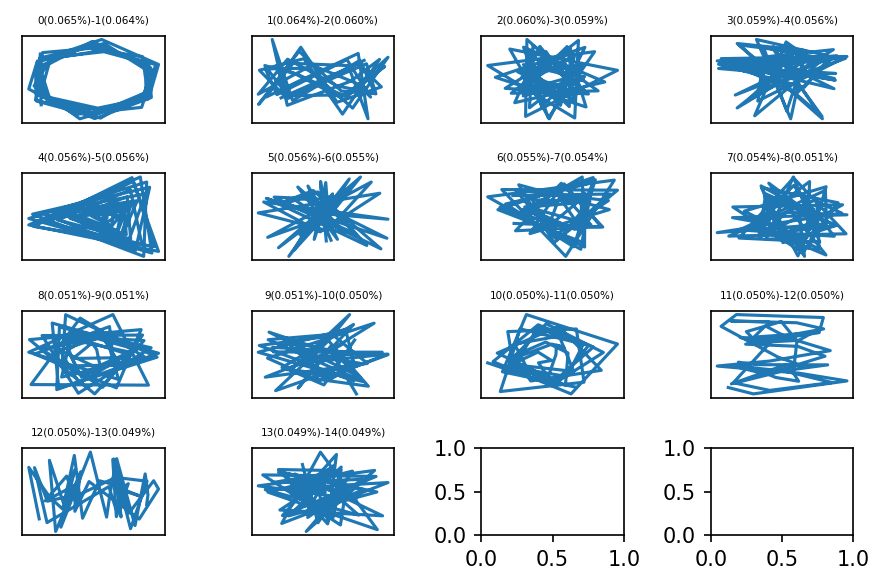

In [77]:
#! 绘制两个特征向量
plot_scatter_eigenvector(model, [i for i in range(0,16)])

[[0, 1, 12, 17, 19, 20, 25, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 21, 22, 23, 24, 27, 28, 29]]


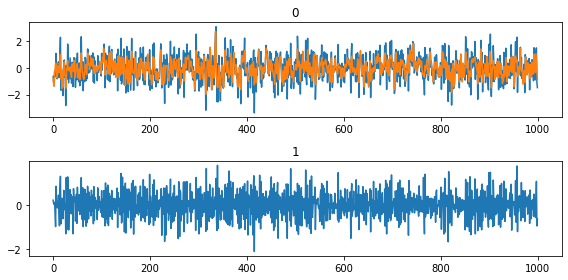

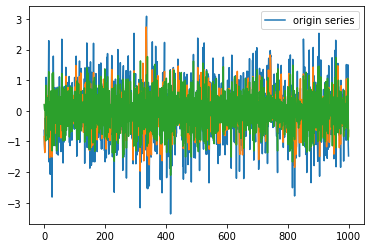

In [78]:
#! 自动分组结果展示
model.grouping(option="SC", params={"n_clusters": 2})
print(model.groups_strategy)
plot_series_array(x, model.components_series_grouped)

[]


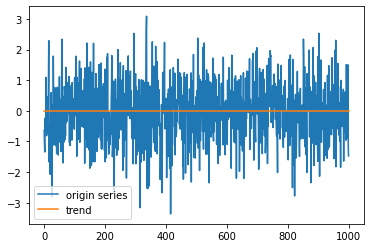

In [79]:
#! 趋势提取结果展示
trend_index, trend = model.extract_trend(omega=0.01/fs, thres=0.9)
print(trend_index)
plt.figure()
plt.plot(x)
plt.plot(trend)
plt.legend(['origin series', 'trend'])
plt.show()

[2]


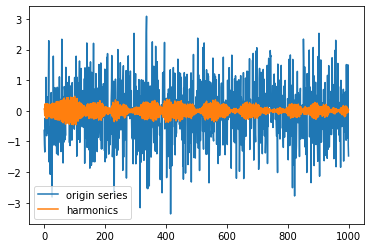

In [80]:
harmonic_index, harmonics = model.extract_harmonics(thres=0.8)
print(harmonic_index)
plt.figure()
plt.plot(x)
plt.plot(harmonics[0])
plt.legend(['origin series', 'harmonics'])
plt.show()

In [81]:
#! 频率估计
omega_estimation = freq_estimation(model.eigenvector_left[:, 1:2], model.eigenvector_left[:, 2:3])
print(omega_estimation*fs, omega)

0.47949961643089806 0.058823529411764705


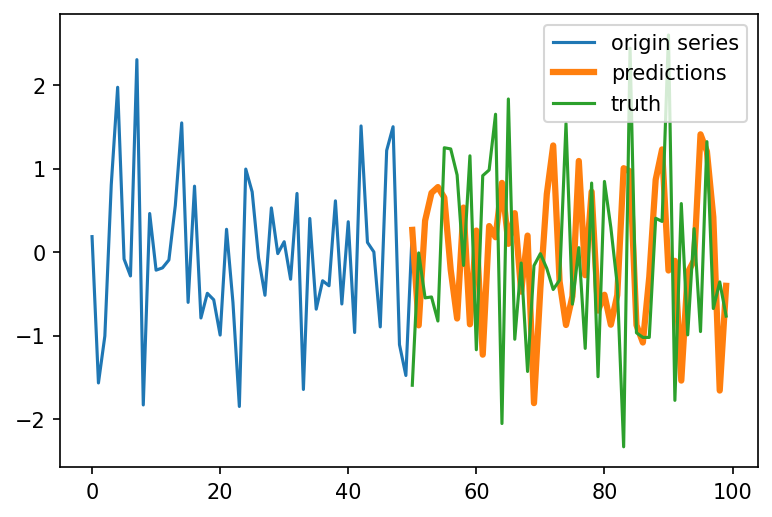

mse:  2.041237985570957


In [85]:
m = 50      # 待预测的点数
t = np.arange(num, num+m, 1)
t = t / fs
# label = np.exp(t/100) + np.sin(2*np.pi*t*omega) + 0.5*np.sin(2*np.pi*t/10)
label = np.random.randn(m)
y = model.predict(m, grouped=True, method='r')
y = np.sum(y, axis=0)
plt.figure(dpi=150)
plt.plot(np.concatenate([x[model.length-m:], y]))
plt.plot([i for i in range(m, m+m)], y, linewidth=3)
plt.plot([i for i in range(m, m+m)], label)
plt.legend(["origin series", "predictions", "truth"])
plt.show()
print("mse: ", np.mean((y-label)**2))

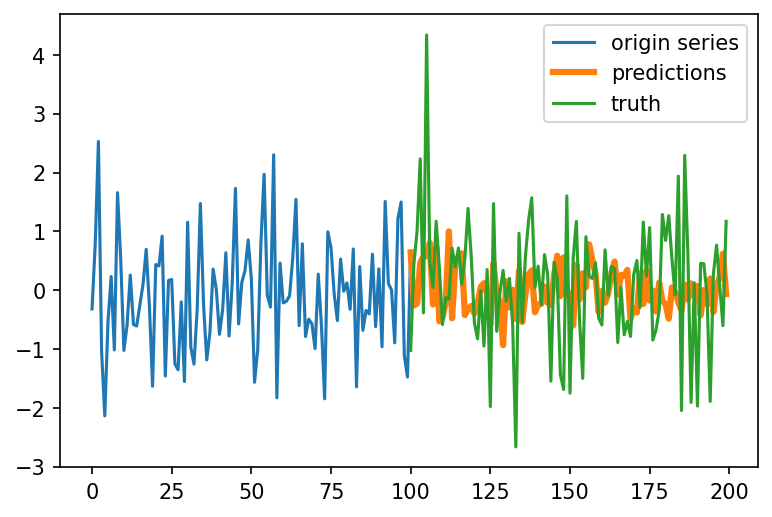

mse:  1.1544246328318666
0.009248707582495465 0.3759508499488768


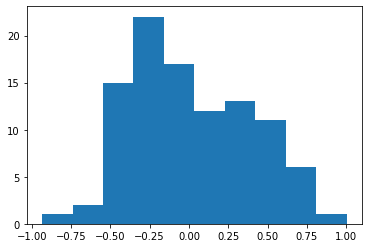

In [87]:
m = 100
t = np.arange(num, num+m, 1)
t = t / fs
# label = np.exp(t/100) + np.sin(2*np.pi*t*omega) + 0.5*np.sin(2*np.pi*t/10)
label = np.random.randn(m)
y = model.predict(m, grouped=True, method='v')
y = np.sum(y, axis=0)
plt.figure(dpi=150)
plt.plot(np.concatenate([x[model.length-m:], y]))
plt.plot([i for i in range(m, m+m)], y, linewidth=3)
plt.plot([i for i in range(m, m+m)], label)
plt.legend(["origin series", "predictions", "truth"])
plt.show()
print("mse: ", np.mean((y-label)**2))

res = y - label
print(np.mean(y), np.std(y))
plt.figure()
plt.hist(y)
plt.show()

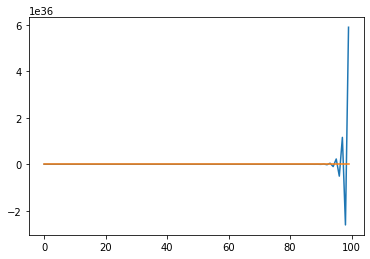

In [84]:
y = model.predict(m, grouped=False, method='v')
y.shape
plt.figure()
plt.plot(y)
plt.plot(label)
plt.show()